In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
%matplotlib inline
import os
import math
import scipy.integrate as integrate
import time

In [41]:
# filename = '/home/xams/xams/PMT12_gain/K_series/K0800.hdf5'
dirname = '/home/xams/lena/run8/processed/pmtdata/'
runname = '170313_102951'
if not os.path.exists(dirname + runname + '.hdf5'):
    raise FileNotFoundError("not found")
    
store = pd.HDFStore(dirname + runname + '.hdf5')
data= store['all_hits']
datapmt1 = data[data['channel'] == 3]
datapmt2 = data[data['channel'] == 0]
melecs1 = datapmt1['area']/1e6
melecs2 = datapmt2['area']/1e6

print(len(datapmt1))

1007523


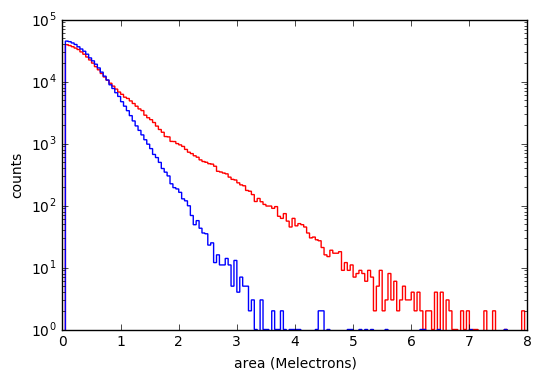

In [67]:
histboundaries = [0.05,8]
histbinwidth = 0.05
histbins = np.arange(histboundaries[0], histboundaries[1]+histbinwidth, histbinwidth)
centers = np.arange(histboundaries[0]+histbinwidth/2.0, histboundaries[1], histbinwidth)

melecs1 = datapmt1['area']/1e6
melecs2 = datapmt2['area']/1e6

hist1 = plt.hist(melecs1, bins=histbins, histtype='step', color = 'red')
hist2 = plt.hist(melecs2, bins=histbins, histtype='step', color = 'blue')
counts1 = hist1[0]
counts2 = hist2[0]
countserr1 = [np.sqrt(t)+0.5 for t in counts1]
countserr2 = [np.sqrt(t)+0.5 for t in counts2]

plt.xlabel("area (Melectrons)")
plt.ylabel("counts")
plt.yscale('log')
# plt.ylim(0,200)
plt.show()

[  1.80383566e+05  -9.18285141e-01   8.07023296e-01   7.38416387e+02
   3.95342062e+00   4.34210479e+00]


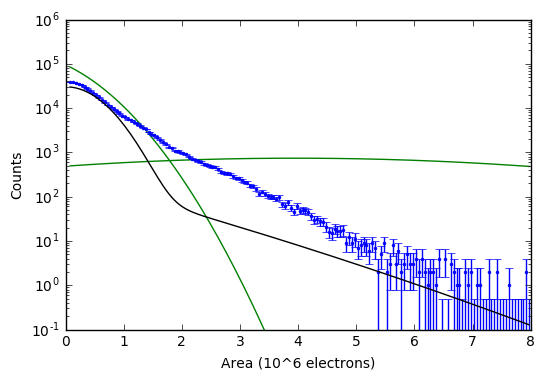

In [75]:
def doublegauss(x, a1, b1, s1, a2, b2, s2):
    return a1 * np.exp(-(x-b1)**2/(2*s1**2)) + a2 * np.exp(-(x-b2)**2/(2*s2**2))

def gauss(x, a1, b1, s1):
    return a1 * np.exp(-(x-b1)**2/(2*s1**2))

def xgauss(x, a1, b1, s1):
    return a1 * x * np.exp(-(x-b1)**2/(2*s1**2))

a1g = 3e4
b1g = 0
s1g = 0.5

a2g = 80e4
b2g = -20
s2g = 5

# popt1, pcov1 = curve_fit(doublegauss, centers, counts1, sigma = countserr1, p0=[a1g, b1g, s1g, a2g, b2g, s2g])
# popt2, pcov2 = curve_fit(doublegauss, centers, counts2, sigma = countserr2, p0=[a1g, b1g, s1g, a2g, b2g, s2g])
perr1 = np.sqrt(np.diag(pcov1))
# perr2 = np.sqrt(np.diag(pcov2))
a1f1, b1f1, s1f1, a2f1, b2f1, s2f1 = popt1
# a1f2, b1f2, s1f2, a2f2, b2f2, s2f2 = popt2

print(popt1)
print(popt2)
# print("  ")

fitcounts1 = [doublegauss(t, popt1[0], popt1[1], popt1[2], popt1[3], popt1[4], popt1[5]) for t in centers]
fitcounts2 = [doublegauss(t, popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5]) for t in centers]
gescounts = [doublegauss(t, a1g, b1g, s1g, a2g, b2g, s2g) for t in centers]
noscounts1 = [gauss(t, popt1[0], popt1[1], popt1[2]) for t in centers]
noscounts2 = [gauss(t, popt2[0], popt2[1], popt2[2]) for t in centers]
sigcounts1 = [gauss(t, popt1[3], popt1[4], popt1[5]) for t in centers]
sigcounts2 = [gauss(t, popt2[3], popt2[4], popt2[5]) for t in centers]


plt.plot(centers, noscounts1, color='green', linewidth = 1)
plt.plot(centers, sigcounts1, color='green', linewidth = 1)
plt.errorbar(centers, counts1, yerr = countserr1, fmt = '.', markersize = 4)
# plt.plot(centers, fitcounts1, color='red', linewidth = 1)
plt.plot(centers, gescounts, color='black', linewidth = 1)
plt.xlabel("Area (10^6 electrons)")
plt.ylabel("Counts")
plt.yscale('log')
plt.xlim()
plt.ylim(1e-1,10e5)
# plt.ylim(0,200)
plt.savefig('filledfits1/' + runname + '_fit_pmt_' + '1DG' + str(int(time.time())) + '.pdf')
plt.savefig('filledfits1/' + runname + '_fit_pmt_' + '1DG' + str(int(time.time())) + '.png')
plt.show()



plt.plot(centers, noscounts2, color='green', linewidth = 1)
plt.plot(centers, sigcounts2, color='green', linewidth = 1)
plt.errorbar(centers, counts2, yerr = countserr2, fmt = '.', markersize = 4)
plt.plot(centers, fitcounts2, color='red', linewidth = 1)
# plt.plot(centers, gescounts, color='black', linewidth = 1)
plt.xlabel("Area (10^6 electrons)")
plt.ylabel("Counts")
plt.yscale('log')
plt.xlim()
plt.ylim(1e-1,10e5)
# plt.ylim(0,300)
plt.savefig('filledfits1/' + runname + '_fit_pmt_' + '2DG' + str(int(time.time())) + '.pdf')
plt.savefig('filledfits1/' + runname + '_fit_pmt_' + '2DG' + str(int(time.time())) + '.png')
plt.show()








In [40]:
totalgral1 = integrate.quad(gauss, 0, np.inf, args = (a2f1, b2f1, s2f1))[0]
totalgral2 = integrate.quad(gauss, 0, np.inf, args = (a2f2, b2f2, s2f2))[0]
totalsignal1 = totalgral1 / histbinwidth
totalsignal2 = totalgral2 / histbinwidth
avggain1 = integrate.quad(xgauss, 0, np.inf, args = (a2f1, b2f1, s2f1))[0]/totalgral1
avggain2 = integrate.quad(xgauss, 0, np.inf, args = (a2f2, b2f2, s2f2))[0]/totalgral2
print('noisewidth1 = ', s1f1)
print('noisewidth2 = ', s1f2)
print('totalsignal1 = ', totalsignal1)
print('totalsignal2 = ', totalsignal2)
print('Poisson stat1 = ', totalsignal1 / len(datapmt1))
print('Poisson stat2 = ', totalsignal2 / len(datapmt2))
print('avggain1 = ', avggain1)
print('avggain2 = ', avggain2)

noisewidth1 =  0.807023295824
noisewidth2 =  0.499936024075
totalsignal1 =  65799.88556624668
totalsignal2 =  71921.94340993524
Poisson stat1 =  0.06550178693391046
Poisson stat2 =  0.07159610951553005
avggain1 =  5.351286457784888
avggain2 =  2.356710778173114
